# Introduction to Machine Learning and Toolkit Exercises 

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv` found in the [data](../../data) directory.

In [2]:
from __future__ import print_function
import os
data_path = ['data']



* checking out the dataframe `.shape` attribute.)
* checking out the dataframe `.columns` attribute.)
* checking out the dataframe `.dtypes` attribute.)

In [3]:
import numpy as num
import pandas as pd


file_path = os.sep.join(data_path + ['Iris_Data.csv'])
data = pd.read_csv(file_path)
data.head()





,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Number of rows
print(data.shape[0])

#Rows and coloumns
print(data.shape)

#Names of columns
print(data.columns.tolist())

#Data types
print(data.dtypes)


(150, 5)


 Examining the species names and  mentioning all begin with 'Iris-'. Removing the portion of the name so the species name is shorter. 

*There are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [71]:

data['species'] = data.species.str.replace('Iris-', '')
data['species'] = data.species.apply(lambda r:r.replace('Iris-', ''))

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa




 
* checking out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

* The `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [72]:
# counting of each sapces present
data.species.value_counts()




setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [73]:
#Select the rows from 'Describe' method and add in the 'Median'
st_df = data.describe()
st_df.loc['range'] = st_df.loc['max'] - st_df.loc['min']
print(st_df)
out_fields = ['mean', '25%', '50%', '75%', 'range']
st_df = st_df.loc[out_fields]
st_df.rename({'50%':'median'}, inplace = True)
st_df

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
range      3.600000     2.400000      5.900000     2.400000


,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000




Calculating the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

* we want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

After finish both of these, calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [99]:
# mean calculation
data.groupby('species').mean()



,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [100]:
# median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [101]:
#applying mean and meadian at once
data.groupby('species').agg(['mean', 'median'])
data.groupby('species').agg([num.mean, num.median])

sepal_length        sepal_width        petal_length         \
                        mean median        mean median         mean median   
species                                                                      
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                petal_width         
                       mean median  
species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

In [77]:
#
from pprint import pprint
agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
data.groupby('species').agg(agg_dict)

sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0



*Making a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

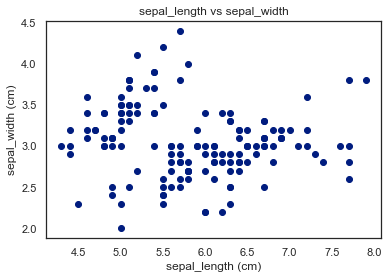

In [98]:
# simple scatter plot with matplotlib
axes = plt.axes()
axes.scatter(data.sepal_length,data.sepal_width)
#label the axes
axes.set (xlabel = 'sepal_length (cm)',
       ylabel = 'sepal_width (cm)',
       title = 'sepal_length vs sepal_width');

       



Making a histogram of any one of the four features. Label axes and title it as appropriate. 

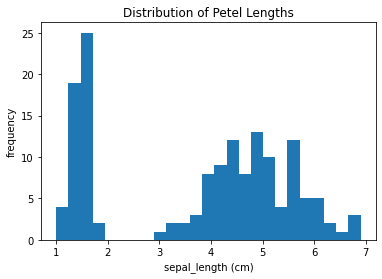

In [56]:
# using matplotlib's plotting functionally
#ax = plt.axes()

#ax.hist(data.petal_length, bins=25);

# panda's plotting functionally
ax = data.petal_length.plot.hist(bins=25)
ax.set (xlabel = 'sepal_length (cm)',
        ylabel = 'frequency',
        title = 'Distribution of Petel Lengths');

        




creating a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. 
For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

In [60]:
try:
    import seaborn as sns
except:
    print('seaborn must be installed for this course ')
    print('conda install seaborn')
    print('from a terminal restart the kernial')


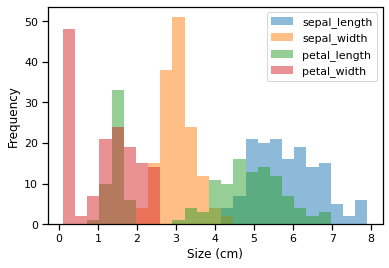

In [61]:
sns.set_context('notebook')

#plot 'hist' method

axes = data.plot.hist(bins=25, alpha=0.5)
axes.set_xlabel('Size (cm)');



Using Pandas, making a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

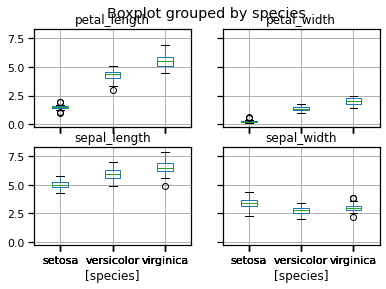

In [63]:
#using panda's plot functionality
data.boxplot(by = 'species');




Now making a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

* checking the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [90]:
# We need to reshape the data after that single measurment in each coloumn
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurment'})
            )

plot_data.head()

,species,measurment,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


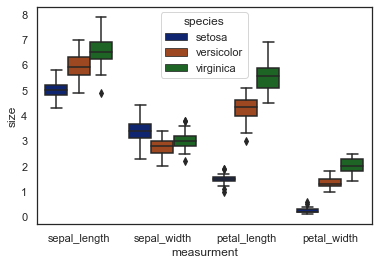

In [92]:
#Plot the dataframe by using seaborn
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurment', y='size', 
            hue='species', data =plot_data);



Making a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

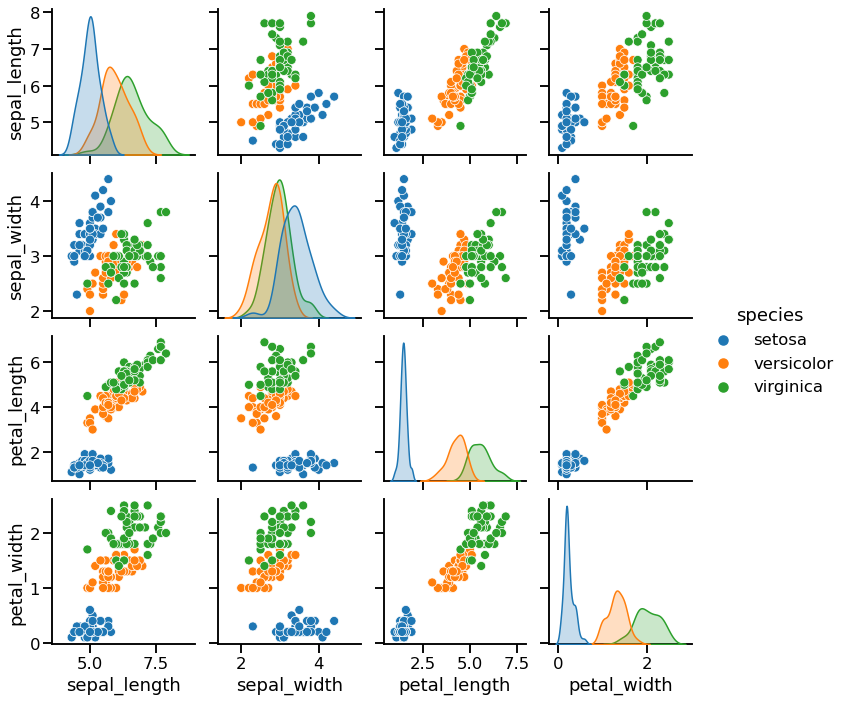

In [91]:
#Pairplot with Seaborn
sns.set_context('talk')
sns.pairplot(data, hue='species');